In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import math

import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [4]:
#import data from kaggle store
data=pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
def description(df):
    dataframe = pd.DataFrame(df.dtypes,columns=['dtypes'])
    dataframe = dataframe.reset_index()
    dataframe['Name'] = dataframe['index']
    dataframe = dataframe[['Name','dtypes']]
    dataframe['Unique'] = df.nunique().values
    for name in dataframe['Name'].value_counts().index:
        dataframe.loc[dataframe['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),3) 
    return dataframe
df1 = description(data)
df1

,Name,dtypes,Unique,Entropy
0,customerID,object,7043,3.848
1,gender,object,2,0.301
2,SeniorCitizen,int64,2,0.192
3,Partner,object,2,0.301
4,Dependents,object,2,0.265
5,tenure,int64,73,1.783
6,PhoneService,object,2,0.138
7,MultipleLines,object,3,0.409
8,InternetService,object,3,0.460
9,OnlineSecurity,object,3,0.450


In [7]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [8]:
def bar_text(subplot):
    for patch in subplot.patches:
        subplot.text(patch.get_x()+patch.get_width()/2,patch.get_height()+20 ,'{:1.2f}'.format(patch.get_height()/len(data)),ha='center')


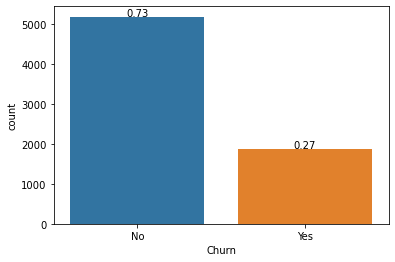

In [9]:
ax = sns.countplot(x = 'Churn',data =data)
bar_text(ax)


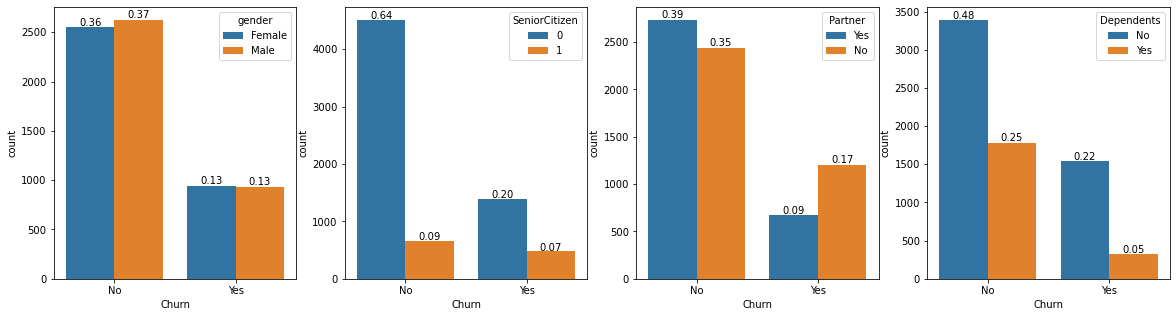

In [10]:
demographic_desc = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig,axes = plt.subplots(nrows = 1, ncols = 4,figsize = (20,5))
for i in demographic_desc:
    ax = sns.countplot(x = 'Churn',hue = i,data =data,ax = axes[demographic_desc.index(i)])
    bar_text(ax)


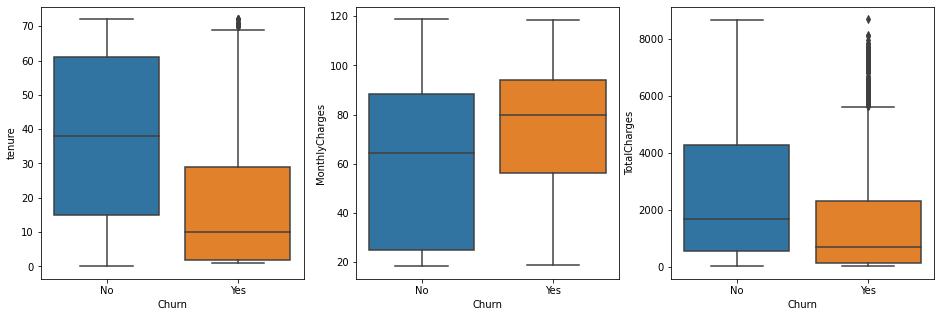

In [11]:
continuous_desc = ['tenure','MonthlyCharges', 'TotalCharges']
fig,axes = plt.subplots(nrows=1,ncols=3,figsize = (16,5))
for i in continuous_desc:
    ax = sns.boxplot(x = 'Churn',y = i,data =data,ax =axes[continuous_desc.index(i)])


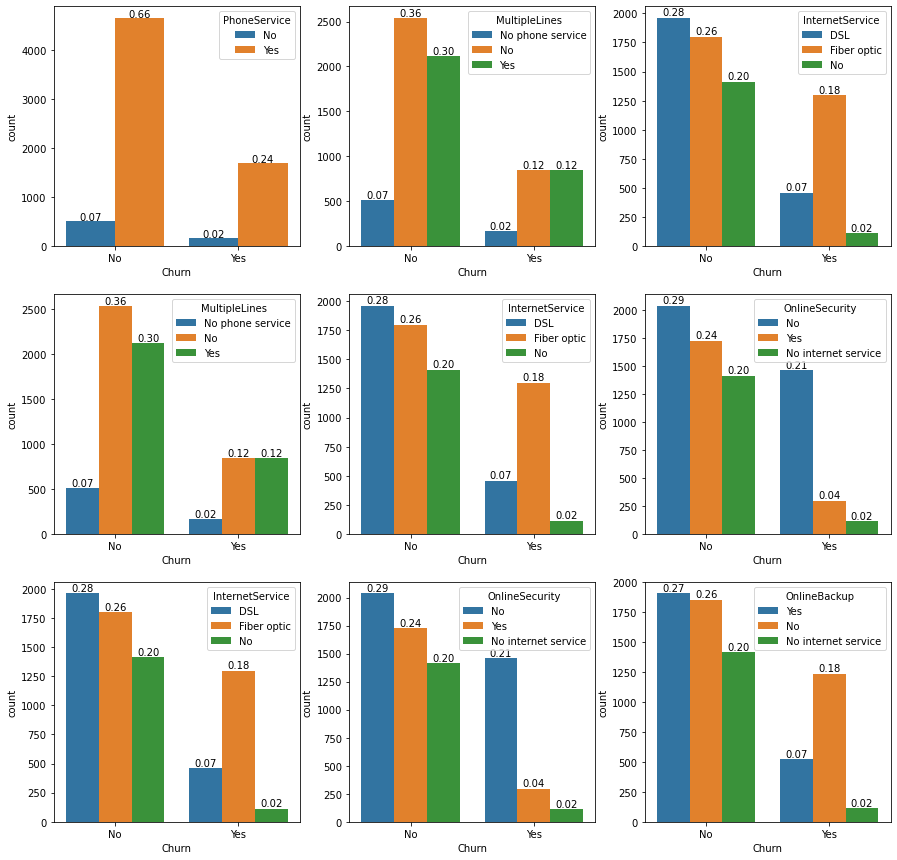

In [12]:
other_desc = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV','StreamingMovies']
fig,axes = plt.subplots(nrows =3,ncols = 3,figsize = (15,15))
for i in range(3):
    for j in range(3):
        ax = sns.countplot(x = 'Churn',hue = other_desc[i+j],data = data,ax =axes[i,j])
        bar_text(ax)


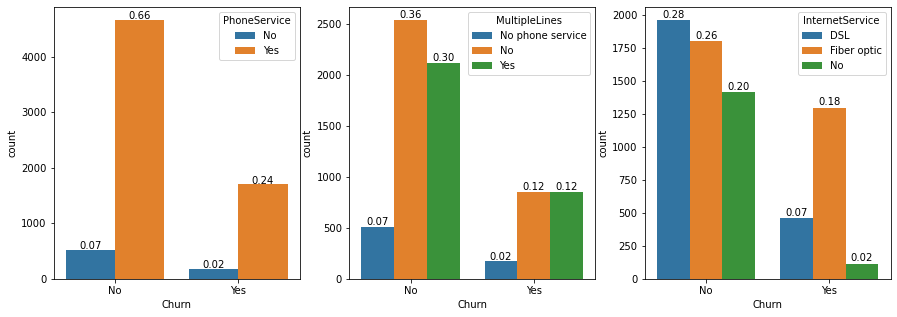

In [13]:
payments_desc = ['Contract', 'PaperlessBilling', 'PaymentMethod',]
fig,axes = plt.subplots(nrows =1,ncols = 3,figsize = (15,5))
for i in range(3):
    ax = sns.countplot(x = 'Churn',hue = other_desc[i],data = data,ax =axes[i])
    bar_text(ax)
plt.show()
plt.show()

[Text(0, 0, 'customerID'),
 Text(1, 0, 'gender'),
 Text(2, 0, 'SeniorCitizen'),
 Text(3, 0, 'Partner'),
 Text(4, 0, 'Dependents'),
 Text(5, 0, 'tenure'),
 Text(6, 0, 'PhoneService'),
 Text(7, 0, 'MultipleLines'),
 Text(8, 0, 'InternetService'),
 Text(9, 0, 'OnlineSecurity'),
 Text(10, 0, 'OnlineBackup'),
 Text(11, 0, 'DeviceProtection'),
 Text(12, 0, 'TechSupport'),
 Text(13, 0, 'StreamingTV'),
 Text(14, 0, 'StreamingMovies'),
 Text(15, 0, 'Contract'),
 Text(16, 0, 'PaperlessBilling'),
 Text(17, 0, 'PaymentMethod'),
 Text(18, 0, 'MonthlyCharges'),
 Text(19, 0, 'TotalCharges'),
 Text(20, 0, 'Churn')]

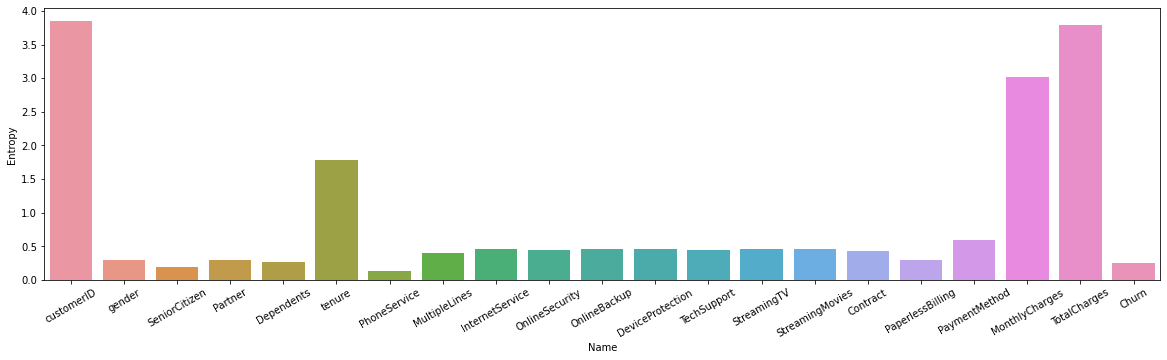

In [14]:
plt.figure(figsize= (20,5))
ax = sns.barplot(x = 'Name',y='Entropy',data=df1)
# plt.xticks(df1['Name'],rotation='Vertical')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

[Text(0, 0, 'gender'),
 Text(1, 0, 'SeniorCitizen'),
 Text(2, 0, 'Partner'),
 Text(3, 0, 'Dependents'),
 Text(4, 0, 'tenure'),
 Text(5, 0, 'PhoneService'),
 Text(6, 0, 'MultipleLines'),
 Text(7, 0, 'InternetService'),
 Text(8, 0, 'OnlineSecurity'),
 Text(9, 0, 'OnlineBackup'),
 Text(10, 0, 'DeviceProtection'),
 Text(11, 0, 'TechSupport'),
 Text(12, 0, 'StreamingTV'),
 Text(13, 0, 'StreamingMovies'),
 Text(14, 0, 'Contract'),
 Text(15, 0, 'PaperlessBilling'),
 Text(16, 0, 'PaymentMethod'),
 Text(17, 0, 'MonthlyCharges'),
 Text(18, 0, 'TotalCharges')]

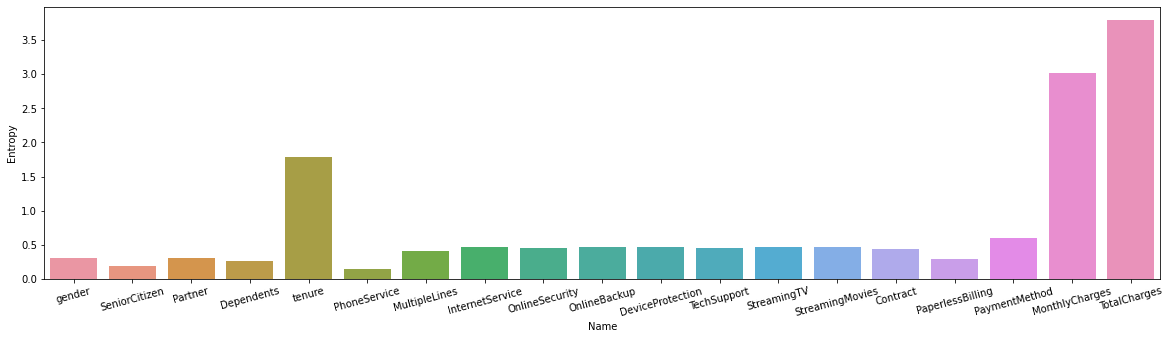

In [15]:
df1 = description(data)
lst = ['customerID','Churn']
df1= df1[~df1['Name'].isin(lst)]
plt.figure(figsize= (20,5))
ax = sns.barplot(x = 'Name',y='Entropy',data=df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=15)

In [16]:
df2 = pd.DataFrame(data.drop(['customerID','Churn'],axis = 1).nunique()).T
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,2,2,2,2,73,2,3,3,3,3,3,3,3,3,3,2,4,1585,6530


In [17]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [18]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [19]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
data = data.iloc[:,1:]

In [21]:
replace_dict = {'Churn':{'Yes':1,'No':0}}


In [22]:
data1 = data.replace(replace_dict)

In [23]:
df3 = pd.get_dummies(data1)
df3.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
5,0,8,99.65,820.50,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0
6,0,22,89.10,1949.40,0,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
8,0,28,104.80,3046.05,1,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
9,0,62,56.15,3487.95,0,0,1,1,0,0,...,0,0,1,0,1,0,1,0,0,0


In [24]:
df3.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.825880,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.102411,0.825880,0.651065,1.000000,-0.199484,-0.000048,0.000048,-0.319072,0.319072,-0.064653,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
Churn,0.150889,-0.352229,0.193356,-0.199484,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,-0.000048,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,0.000048,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.319072,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.319072,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.064653,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


<AxesSubplot:>

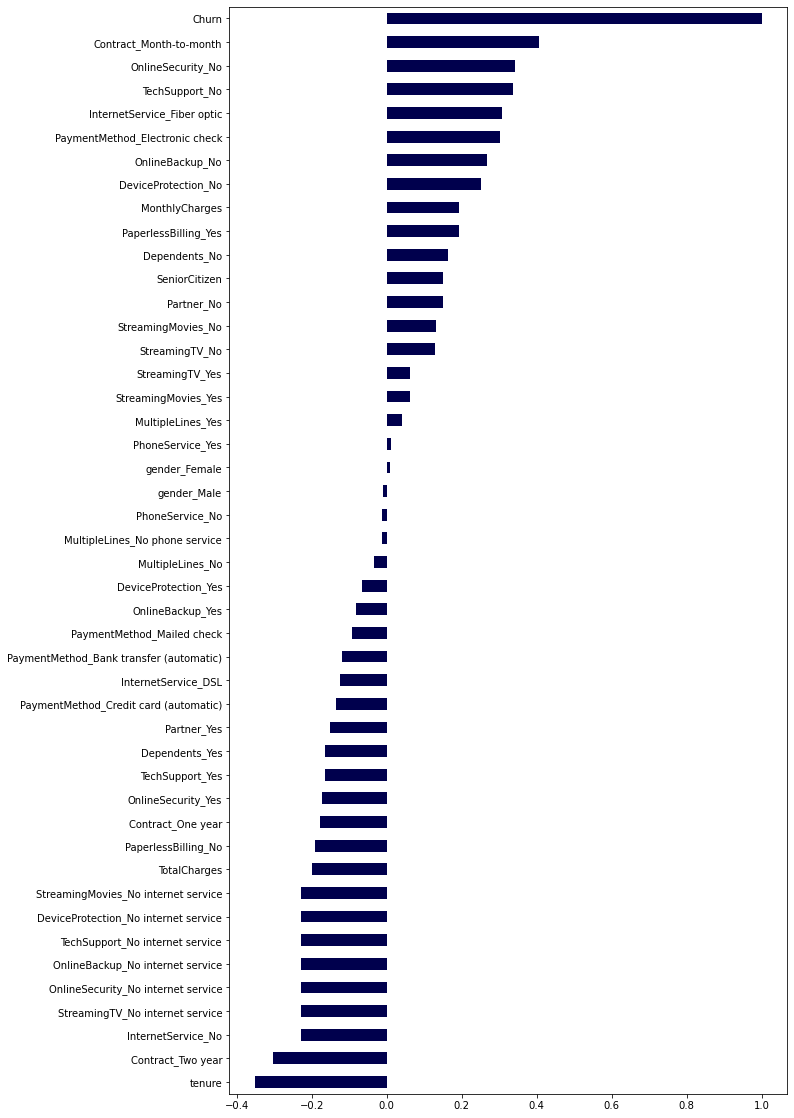

In [25]:
plt.figure(figsize = (10,20))
df3.corr()['Churn'].sort_values().plot(kind = 'barh',colormap='seismic')

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve


In [27]:
df3 = df3.dropna(axis=0)

In [28]:

x = df3.loc[:,df3.columns != 'Churn']
y =df3['Churn']

In [29]:
# x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=0)

In [30]:
# log_classifier= LogisticRegressionCV(cv=5,random_state = 10,max_iter = 200,penalty ='l2')
# log_classifier.fit(x_train, y_train)

# #     break

Logistic: ROC AUC=0.848


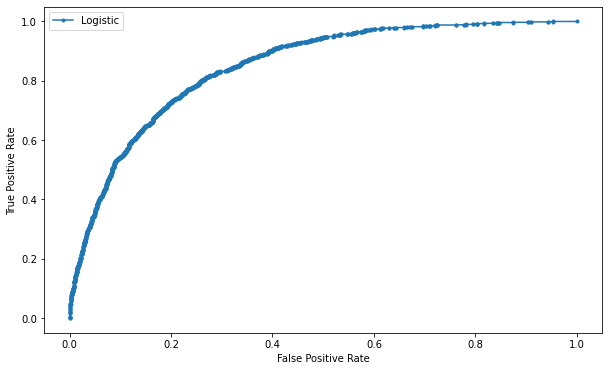

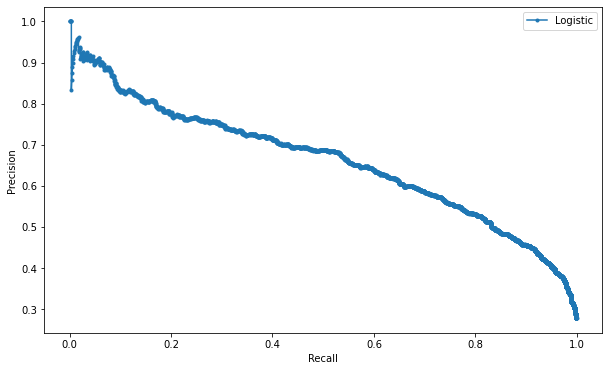

In [64]:
x_train, x_test,y_train,y_test=train_test_split(x, y, test_size=0.75, random_state=0)

log_classifier= LogisticRegressionCV(cv=10,class_weight='balanced',random_state = 10,max_iter = 200)
log_classifier.fit(x_train, y_train)

lr_probs = log_classifier.predict_proba(x_test)
lr_probs = lr_probs[:, 1]

# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Logistic: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)


# plot the roc curve for the model
plt.figure(figsize=(10,6))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
# plot the precision-recall curves
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [75]:
pd.Series(log_classifier.coef_[0],index=x.columns.values).sort_values()

Contract_Two year                         -0.405000
OnlineSecurity_Yes                        -0.204869
MultipleLines_No                          -0.158147
PhoneService_Yes                          -0.141178
PaperlessBilling_No                       -0.139472
TechSupport_Yes                           -0.132307
PaymentMethod_Credit card (automatic)     -0.121816
PaymentMethod_Bank transfer (automatic)   -0.090580
InternetService_DSL                       -0.086892
Contract_One year                         -0.064063
tenure                                    -0.050485
OnlineBackup_Yes                          -0.046864
PaymentMethod_Mailed check                -0.028895
Dependents_Yes                            -0.025360
StreamingMovies_No                        -0.022255
TechSupport_No internet service           -0.022162
StreamingMovies_No internet service       -0.022162
DeviceProtection_No internet service      -0.022162
StreamingTV_No internet service           -0.022162
OnlineBackup

<AxesSubplot:>

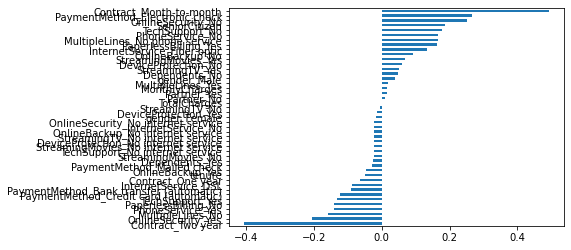

In [74]:
plt.figure(figsize=(10,12))
pd.Series(log_classifier.coef_[0],index=x.columns.values).sort_values().plot(kind='barh')